# Project Luther
## What Makes a Comparable Company?
### Hasan Haq

In [317]:
import data
import matplotlib.pyplot as plt
import good_morning as gm
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from tqdm import tqdm
%matplotlib inline

## **Russell 1000 Stock Tickers**

In [2]:
ticks = []

with open('russ1000.csv', 'r', encoding='utf-8') as f:
    csvfile = csv.reader(f)
    next(csvfile, None)
    for i in csvfile:
        ticks.append(i[0])

# **View an example Morningstar data frame**

In [10]:
kr = gm.KeyRatiosDownloader()
ms = kr.download('APA')
ms[0]

Period,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Key Financials USD,,,,,,,,,,,
Revenue USD Mil,8074.00,9962.00,12390.00,8615.00,12092.00,16888.00,16564.00,14438.00,12801.00,6366.00,4862.00
Gross Margin %,82.10,82.00,83.30,79.00,81.70,82.80,81.40,79.70,80.40,67.60,63.40
Operating Income USD Mil,3917.00,4855.00,932.00,326.00,5435.00,8093.00,5012.00,3908.00,-2809.00,-28226.00,-22969.00
Operating Margin %,48.50,48.70,7.50,3.80,44.90,47.90,30.30,27.10,-21.90,-443.40,-472.40
Net Income USD Mil,2552.00,2812.00,712.00,-285.00,3032.00,4584.00,2001.00,2232.00,-5403.00,-23119.00,-18005.00
Earnings Per Share USD,7.64,8.39,2.09,-0.87,8.46,11.47,4.92,5.50,-14.06,-61.20,-47.64
Dividends USD,0.45,0.60,0.60,0.60,0.60,0.60,0.66,0.77,0.95,1.00,1.00
Payout Ratio % *,NaN,7.10,28.70,NaN,7.10,5.90,13.40,11.00,NaN,NaN,NaN
Shares Mil,333.00,335.00,337.00,336.00,359.00,400.00,391.00,406.00,384.00,378.00,379.00


# **Iterate through and populate data for each ticker**

In [40]:
sic_num = []
ceo_good = []
ceo_age = []
score = []
cap = []
ocf = []
inv = []
capex = []
fcf = []
div = []
hist_eps = []
marg = []
cash = []
debt = []
ebitda = []
beta = []
inst = []
yr_hi = []
yr_200_hi = []
yr_50_hi = []
vol = []
px_gr = []
eps_gr = []
sg = []
rd = []
tax = []
roe = []
dso = []
ticky = []
    
kr = gm.KeyRatiosDownloader()

for t in tqdm(ticks):
    try:
        share = data.Share(t)
        ms = kr.download(t)
    except:
        continue
    try:
        temp = data.wsj(t)
        cash.append(temp[0])
        debt.append(temp[1])
        ebitda.append(temp[2])
    except:
        continue
    try:
        temp = data.reut_fin(t)
        beta.append(temp[0])
        inst.append(temp[1])
    except:
        beta.append(1)
        inst.append(0)
    try:
        sic_num.append(data.query_sic(t))
    except:
        sic_num.append(0)
    try:
        ceo_good.append(data.ceo(t)[2])
    except:
        ceo_good.append(False)
    try:    
        ceo_age.append(int(data.ceo(t)[1]))
    except:
        ceo_age.append(0)
    try:
        score.append(data.anal_score(t))
    except:
        score.append(0)
    try:
        cap.append(data.mb(share.get_market_cap()))
    except:
        cap.append(0)
    try:
        ocf.append(int(ms[0].iloc[10][-1]))
    except:
        ocf.append(-1)
    try:
        capex.append(ms[7].iloc[2][-1])
    except:
        capex.append(-1)
    try:
        fcf.append(float(int(float(np.nan_to_num(ms[7].iloc[3][-1]))*100)/100.00))
    except:
        fcf.append(-1)
    try:
        hist_eps.append(float(int(float(np.nan_to_num(ms[6].iloc[0][-1]))*100))/100.00)
    except:
        hist_eps.append(0.00)
    try:
        marg.append(float(np.nan_to_num(ms[0].iloc[3][-1])))
    except:
        marg.append(-1.00)
    try:
        sg.append(float(np.nan_to_num(ms[1].iloc[3][-1])))
    except:
        sg.append(0.00)
    try:
        rd.append(float(np.nan_to_num(ms[1].iloc[4][-1])))
    except:
        rd.append(0.00)
    try:
        tax.append(data.pct(np.nan_to_num(ms[2].iloc[0][-1])))
    except:
        tax.append(0.00)
    try:
        roe.append(float(np.nan_to_num(ms[2].iloc[5][-1])))
    except:
        roe.append(0.0)
    try:
        inv.append(int(np.nan_to_num(ms[10].iloc[5][-1])))
    except:
        inv.append(-1)
    try:
        dso.append(int(np.nan_to_num(ms[10].iloc[0][-1])))
    except:
        dso.append(-1)
    try:
        div.append(data.pct(share.get_dividend_yield()))
    except:
        div.append(0.00)
    try:
        yr_hi.append(data.pct(share.get_percent_change_from_year_high()))
    except:
        yr_hi.append(0.0)
    try:
        yr_200_hi.append(data.pct(share.get_percent_change_from_200_day_moving_average()))
    except:
        yr_200_hi.append(0.0)
    try:
        yr_50_hi.append(data.pct(share.get_percent_change_from_50_day_moving_average()))
    except:
        yr_50_hi.append(0.0)  
    try:
        vol.append(float(int(100*float(share.get_avg_daily_volume())/1000000.00)/100))
    except:
        vol.append(0.00)
    try:
        px_gr.append(float(int(100*float(share.get_one_yr_target_price())/float(share.get_price())))/100)
    except:
        px_gr.append(0.00)
    try:
        eps_gr.append(float(int(100*float(share.get_EPS_estimate_next_year())/float(share.get_EPS_estimate_current_year())))/100)
    except:
        eps_gr.append(0.00)
    ticky.append(t)

100%|██████████| 505/505 [37:23<00:00,  3.90s/it]


## **Create the DataFrame**

In [320]:
# df = pd.DataFrame({'ticker': ticky, 'cash': cash, 'debt': debt, 'ebitda': ebitda, 'cap': cap, 'sic_num': sic_num, 
#                    'ceo_good': ceo_good, 'ceo_age': ceo_age, 'score': score, 'ocf': ocf, 'inv': inv, 'capex': capex, 
#                    'fcf': fcf, 'div': div, 'hist_eps': hist_eps, 'marg': marg, 'beta': beta, 'inst': inst,
#                    'yr_hi': yr_hi, 'yr_200_hi': yr_200_hi, 'yr_50_hi': yr_50_hi, 'vol': vol, 'px_gr': px_gr,
#                    'eps_gr': eps_gr, 'sg': sg, 'rd': rd, 'tax': tax, 'roe': roe, 'dso': dso})
# df.to_csv('df.csv')
# df.to_pickle('df.pkl')
# df = pd.read_pickle('df.pkl')
df = pd.read_pickle('df_1000.pkl')
df

,beta,cap,capex,cash,ceo_age,ceo_good,debt,div,dso,ebitda,...,roe,score,sg,sic_num,tax,ticker,vol,yr_200_hi,yr_50_hi,yr_hi
0,1.00,6890.00,4.24,853,0,False,1445,1.25,20,1028,...,-11.81,0,3.89,5,0.00,AA,4.75,27.40,16.75,-3.24
1,1.00,22660.00,14.49,6949,54,False,20754,0.89,16,8900,...,139.04,5,29.51,6,0.00,AAL,6.73,7.13,-7.16,-13.03
2,1.06,11950.00,2.92,91,58,False,1232,0.15,16,1147,...,17.09,15,36.51,8,37.71,AAP,1.05,1.56,-4.70,-8.71
3,1.14,682750.00,5.94,67155,55,True,87032,1.87,22,68986,...,34.69,40,6.55,5,25.85,AAPL,31.63,14.20,7.87,-1.88
4,0.87,19310.00,0.35,2768,54,False,4481,1.75,22,2020,...,78.77,7,1.41,7,31.55,ABC,2.78,6.68,6.62,-5.11
5,0.84,3360.00,14.13,11,62,False,2240,0.00,34,384,...,-0.06,14,26.59,10,107.73,ACHC,1.22,-12.24,5.27,-41.00
6,1.92,5630.00,1.10,692,52,False,4125,0.00,74,926,...,2.84,9,0.66,10,0.00,ACM,1.55,9.77,-1.32,-10.17
7,1.17,70760.00,1.38,4908,56,True,27,2.11,43,5516,...,64.54,19,15.63,10,20.43,ACN,2.53,-2.25,-3.05,-9.61
8,0.86,25300.00,1.49,2106,54,False,5877,2.72,12,2221,...,8.89,2,3.27,5,16.63,ADM,3.42,0.06,-2.37,-8.17
9,1.00,6090.00,2.60,2139,0,False,3564,0.00,45,1059,...,-31.17,6,7.26,5,471.54,ADNT,1.37,18.94,8.61,-3.53


## Add New Columns

In [321]:
# Create EBITDA multiple and leverage multiple columns
df['ebitda_mult'] = (df['cap'] + df['debt'] - df['cash']/df['ebitda'])
df['debt_mult'] = (df['debt']/df['ebitda'])

# Create R&D dummy variable column
df['rd_dum'] = [1 if x != 0 else 0 for x in df['rd']]

## **Clean Up Data (Handle Outliers)**

In [322]:
# Delete all items where market cap = 0
df_temp = df.loc[df['cap']!=0]

# Replace hist_eps outliers with mean/max/min
eps_calc = df_temp['hist_eps'].loc[((df_temp['hist_eps']<200) | (df_temp['hist_eps']>-200)) & (df_temp['hist_eps'] != 0)]
df_temp.loc[df_temp['hist_eps']>=200, 'hist_eps'] = float(int(float(max(eps_calc)*100)/100))
df_temp.loc[df_temp['hist_eps']<=-200, 'hist_eps'] = float(int(float(min(eps_calc))*100)/100)
df_temp.loc[df_temp['hist_eps'] == 0, 'hist_eps'] = float(int(float(eps_calc.mean())*100)/100)

# Replace margin outliers with mean/max/min
marg_calc = df_temp['marg'].loc[((df_temp['marg']<90) & (df_temp['marg']>0))]
df_temp.loc[df_temp['marg']>=90, 'marg'] = float(int(float(max(marg_calc)*100)/100))
df_temp.loc[df_temp['marg']<=0, 'marg'] = float(int(float(min(marg_calc)*100)/100))

# Replace institutional % outliers with mean
inst_calc = df_temp['inst'].loc[(df_temp['inst'] != 0)]
df_temp.loc[(df_temp['inst'] == 0), 'inst'] = float(int(float(inst_calc.mean())*100)/100)

# Replace sg % outliers with mean
sg_calc = df_temp['sg'].loc[(df_temp['sg'] != 0)]
df_temp.loc[(df_temp['sg'] == 0), 'sg'] = float(int(float(sg_calc.mean())*100)/100)

# Replace tax % outliers with mean
tax_calc = df_temp['tax'].loc[(df_temp['tax'] != 0)]
df_temp.loc[(df_temp['tax'] == 0), 'tax'] = float(int(float(tax_calc.mean())*100)/100)

# Replace ceo_age with mean
ceo_calc = df_temp['ceo_age'].loc[(df_temp['ceo_age'] != 0)]
df_temp.loc[(df_temp['ceo_age'] == 0), 'ceo_age'] = float(int(float(ceo_calc.mean())*100)/100)

# Replace leverage multiple outliers with mean
debt_calc = df_temp['debt_mult'].loc[(df_temp['debt_mult'] < 20)]
df_temp.loc[(df_temp['debt_mult'] >= 20), 'debt_mult'] = float(int(float(max(debt_calc)*100)/100))

# Convert boolean to integer
df_temp['ceo_good'] = [1 if x == True else 0 for x in df_temp['ceo_good']]

# Fix the capex NA
capex_calc = df_temp['capex'].loc[(df_temp['capex'] == df_temp['capex'])]
df_temp.loc[(df_temp['capex'] != df_temp['capex']), 'capex'] = float(int(float(capex_calc.mean())*100)/100)

# Save the new DataFrame
df_clean = df_temp.copy()
df_clean.reindex()

//anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,beta,cap,capex,cash,ceo_age,ceo_good,debt,div,dso,ebitda,...,sic_num,tax,ticker,vol,yr_200_hi,yr_50_hi,yr_hi,ebitda_mult,debt_mult,rd_dum
0,1.00,6890.00,4.24,853,56.26,0,1445,1.25,20,1028,...,5,33.16,AA,4.75,27.40,16.75,-3.24,8334.170233,1.405642,1
1,1.00,22660.00,14.49,6949,54.00,0,20754,0.89,16,8900,...,6,33.16,AAL,6.73,7.13,-7.16,-13.03,43413.219213,2.331910,0
2,1.06,11950.00,2.92,91,58.00,0,1232,0.15,16,1147,...,8,37.71,AAP,1.05,1.56,-4.70,-8.71,13181.920663,1.074106,0
3,1.14,682750.00,5.94,67155,55.00,1,87032,1.87,22,68986,...,5,25.85,AAPL,31.63,14.20,7.87,-1.88,769781.026542,1.261589,1
4,0.87,19310.00,0.35,2768,54.00,0,4481,1.75,22,2020,...,7,31.55,ABC,2.78,6.68,6.62,-5.11,23789.629703,2.218317,0
5,0.84,3360.00,14.13,11,62.00,0,2240,0.00,34,384,...,10,107.73,ACHC,1.22,-12.24,5.27,-41.00,5599.971354,5.833333,0
6,1.92,5630.00,1.10,692,52.00,0,4125,0.00,74,926,...,10,33.16,ACM,1.55,9.77,-1.32,-10.17,9754.252700,4.454644,0
7,1.17,70760.00,1.38,4908,56.00,1,27,2.11,43,5516,...,10,20.43,ACN,2.53,-2.25,-3.05,-9.61,70786.110225,0.004895,0
8,0.86,25300.00,1.49,2106,54.00,0,5877,2.72,12,2221,...,5,16.63,ADM,3.42,0.06,-2.37,-8.17,31176.051778,2.646105,0
9,1.00,6090.00,2.60,2139,56.26,0,3564,0.00,45,1059,...,5,471.54,ADNT,1.37,18.94,8.61,-3.53,9651.980170,3.365439,0


## View New Data

In [323]:
df_clean.to_csv('df_clean_1000.csv')
df_clean

,beta,cap,capex,cash,ceo_age,ceo_good,debt,div,dso,ebitda,...,sic_num,tax,ticker,vol,yr_200_hi,yr_50_hi,yr_hi,ebitda_mult,debt_mult,rd_dum
0,1.00,6890.00,4.24,853,56.26,0,1445,1.25,20,1028,...,5,33.16,AA,4.75,27.40,16.75,-3.24,8334.170233,1.405642,1
1,1.00,22660.00,14.49,6949,54.00,0,20754,0.89,16,8900,...,6,33.16,AAL,6.73,7.13,-7.16,-13.03,43413.219213,2.331910,0
2,1.06,11950.00,2.92,91,58.00,0,1232,0.15,16,1147,...,8,37.71,AAP,1.05,1.56,-4.70,-8.71,13181.920663,1.074106,0
3,1.14,682750.00,5.94,67155,55.00,1,87032,1.87,22,68986,...,5,25.85,AAPL,31.63,14.20,7.87,-1.88,769781.026542,1.261589,1
4,0.87,19310.00,0.35,2768,54.00,0,4481,1.75,22,2020,...,7,31.55,ABC,2.78,6.68,6.62,-5.11,23789.629703,2.218317,0
5,0.84,3360.00,14.13,11,62.00,0,2240,0.00,34,384,...,10,107.73,ACHC,1.22,-12.24,5.27,-41.00,5599.971354,5.833333,0
6,1.92,5630.00,1.10,692,52.00,0,4125,0.00,74,926,...,10,33.16,ACM,1.55,9.77,-1.32,-10.17,9754.252700,4.454644,0
7,1.17,70760.00,1.38,4908,56.00,1,27,2.11,43,5516,...,10,20.43,ACN,2.53,-2.25,-3.05,-9.61,70786.110225,0.004895,0
8,0.86,25300.00,1.49,2106,54.00,0,5877,2.72,12,2221,...,5,16.63,ADM,3.42,0.06,-2.37,-8.17,31176.051778,2.646105,0
9,1.00,6090.00,2.60,2139,56.26,0,3564,0.00,45,1059,...,5,471.54,ADNT,1.37,18.94,8.61,-3.53,9651.980170,3.365439,0


## **Check Out the Correlation**

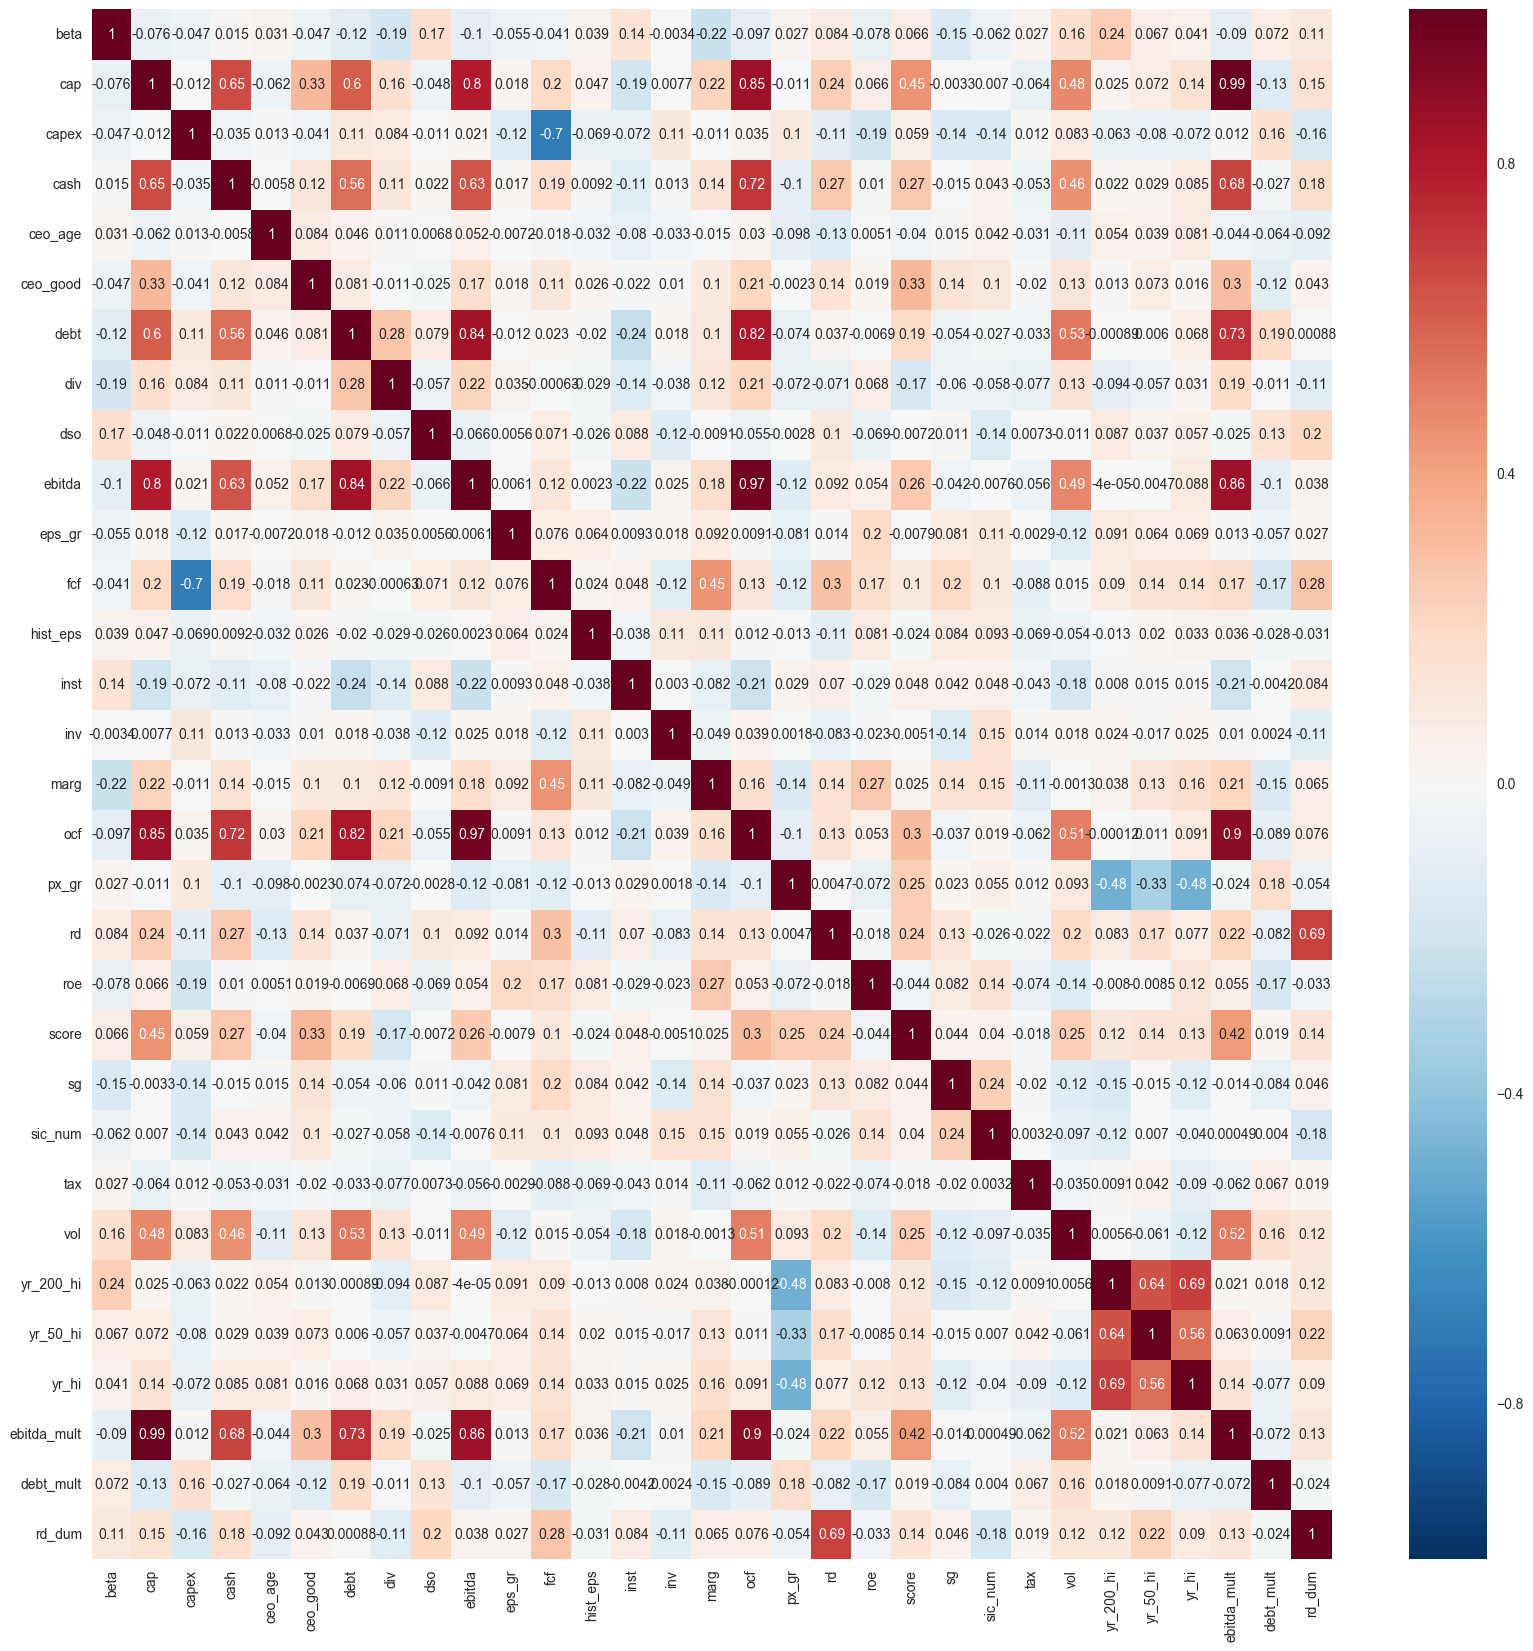

In [327]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_clean.corr(), annot=True, ax=ax);

## **Make our Dummy Variables**

In [324]:
df_cleandum = pd.get_dummies(df_clean, columns=['sic_num'], drop_first=True)
df_cleandum

,beta,cap,capex,cash,ceo_age,ceo_good,debt,div,dso,ebitda,...,rd_dum,sic_num_1,sic_num_2,sic_num_3,sic_num_5,sic_num_6,sic_num_7,sic_num_8,sic_num_9,sic_num_10
0,1.00,6890.00,4.24,853,56.26,0,1445,1.25,20,1028,...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.00,22660.00,14.49,6949,54.00,0,20754,0.89,16,8900,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.06,11950.00,2.92,91,58.00,0,1232,0.15,16,1147,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.14,682750.00,5.94,67155,55.00,1,87032,1.87,22,68986,...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.87,19310.00,0.35,2768,54.00,0,4481,1.75,22,2020,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.84,3360.00,14.13,11,62.00,0,2240,0.00,34,384,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1.92,5630.00,1.10,692,52.00,0,4125,0.00,74,926,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.17,70760.00,1.38,4908,56.00,1,27,2.11,43,5516,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.86,25300.00,1.49,2106,54.00,0,5877,2.72,12,2221,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.00,6090.00,2.60,2139,56.26,0,3564,0.00,45,1059,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## **Create a Regression Summary Table (Manual - Statsmodels)**

In [196]:
df_cleandum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 307
Data columns (total 38 columns):
beta           306 non-null float64
cap            306 non-null float64
capex          305 non-null float64
cash           306 non-null int64
ceo_age        306 non-null float64
ceo_good       306 non-null int64
debt           306 non-null int64
div            306 non-null float64
dso            306 non-null int64
ebitda         306 non-null int64
eps_gr         306 non-null float64
fcf            306 non-null float64
hist_eps       306 non-null float64
inst           306 non-null float64
inv            306 non-null int64
marg           306 non-null float64
ocf            306 non-null int64
px_gr          306 non-null float64
rd             306 non-null float64
roe            306 non-null float64
score          306 non-null int64
sg             306 non-null float64
tax            306 non-null float64
ticker         306 non-null object
vol            306 non-null float64
yr_200_hi   

In [171]:
df_cleandum.columns

Index(['beta', 'cap', 'capex', 'cash', 'ceo_age', 'ceo_good', 'debt', 'div',
       'dso', 'ebitda', 'eps_gr', 'fcf', 'hist_eps', 'inst', 'inv', 'marg',
       'ocf', 'px_gr', 'rd', 'roe', 'score', 'sg', 'tax', 'ticker', 'vol',
       'yr_200_hi', 'yr_50_hi', 'yr_hi', 'ebitda_mult', 'debt_mult', 'rd_dum',
       'sic_num_3', 'sic_num_5', 'sic_num_6', 'sic_num_7', 'sic_num_8',
       'sic_num_9', 'sic_num_10'],
      dtype='object')

## Decide Which Columns to Drop... 

In [325]:
y=df_cleandum['ebitda_mult']
y=np.log(y)
x=df_cleandum.drop(['cap', 'cash', 'debt', 'ebitda', 'ocf', 'ticker', 'ebitda_mult',
                    'ceo_age', 'rd_dum', 'yr_50_hi', 'tax', 'sg', 'roe', 'marg',
                    'px_gr', 'eps_gr', 'inv', 'hist_eps', 'yr_200_hi', 'yr_hi', 'ceo_good'],1)

In [326]:
lsm = sm.OLS(y,x)
fit = lsm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ebitda_mult   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     3249.
Date:                Thu, 02 Feb 2017   Prob (F-statistic):               0.00
Time:                        18:44:57   Log-Likelihood:                -717.93
No. Observations:                 547   AIC:                             1474.
Df Residuals:                     528   BIC:                             1556.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
beta          -0.2106      0.093     -2.258      0.024        -0.394    -0.027
capex          0.0164      0.005      3.250      0.001         0.006     0.026
div            0.1712      0.029      5.902      0.000         0.114     0.228
dso            0.0029      0.001      2.231      0.026         0.000     0.005
fcf            0.0183      0.005      3.489      0.001         0.008     0.029
inst           0.0024      0.002      0.956      0.340        -0.002     0.007
rd             0.0021      0.009      0.227      0.820        -0.016     0.020
score          0.0654      0.006     11.101      0.000         0.054     0.077
vol            0.0711      0.008      8.468      0.000         0.055     0.088
debt_mult      0.0089      0.021      0.430      0.668        -0.032     0.050
sic_num_1      8.3118      0.949      8.755      0.000         6.447    10.177
sic_num_2      7.5886      0.350     21.679      0.000         6.901     8.276
sic_num_3      7.8841      0.392     20.125      0.000         7.115     8.654
sic_num_5      8.3303      0.246     33.910      0.000         7.848     8.813
sic_num_6      8.4319      0.267     31.539      0.000         7.907     8.957
sic_num_7      8.3423      0.300     27.838      0.000         7.754     8.931
sic_num_8      8.2419      0.256     32.203      0.000         7.739     8.745
sic_num_9      8.6100      0.529     16.266      0.000         7.570     9.650
sic_num_10     8.0066      0.273     29.301      0.000         7.470     8.543
==============================================================================
Omnibus:                      361.903   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9994.760
Skew:                           2.444   Prob(JB):                         0.00
Kurtosis:                      23.363   Cond. No.                     2.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Statsmodels Residual Plot

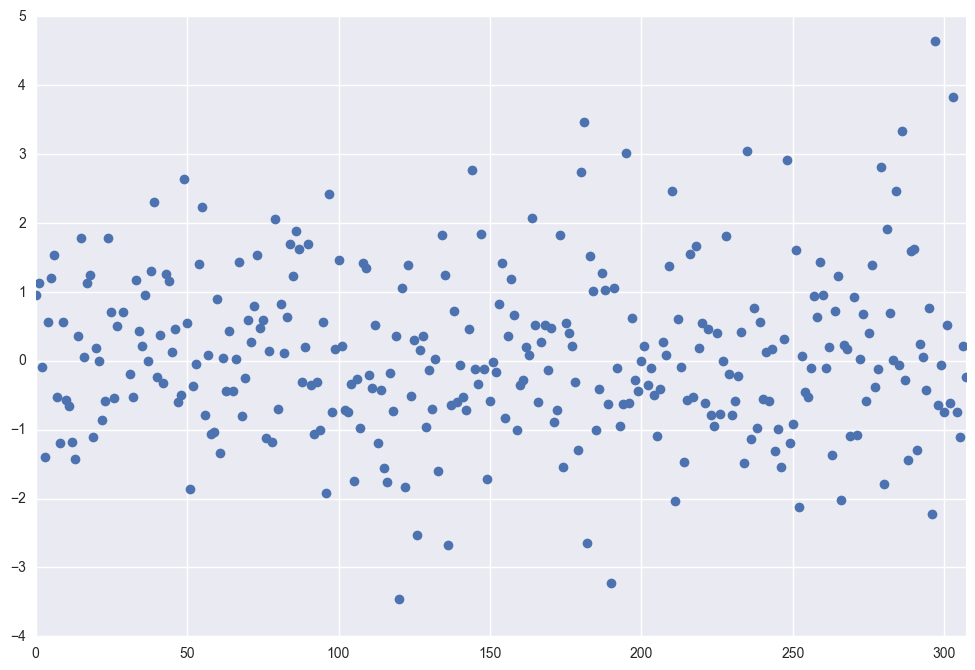

In [297]:
fit.resid.plot(style='o', figsize=(12,8));

## Linear Regression with sklearn

In [316]:
lr1 = LinearRegression()

# lr1.fit(x, y)
# # # # Print out the R^2 for the model against the full dataset
# lr1.score(x,y)
y

0        8074.170233
1       43423.219213
2       13061.920663
3      773571.026542
4       23979.629703
5       70516.110225
6       31066.051778
7       20135.864312
8       28216.464866
9      128735.767270
10       7875.536530
11      33084.089655
12      41051.596406
13      13761.651737
14     150332.984819
15     413044.539379
16       7666.925852
17      30697.592952
18      53960.765074
19      36404.509477
20      23560.196025
21      94911.190327
22       8148.754875
23      25428.916455
24     111140.653464
25      32674.912923
26      15702.381130
27      49550.520782
29      18510.797651
31      38306.795382
32      11306.556391
33      15030.160889
34      22477.485837
35      29658.259818
36      92501.811080
37      14669.372569
38      36207.896041
39      20570.859852
40      49723.874610
41      18894.612830
42      15662.874291
43      11589.818378
44      17859.674777
45     243265.875043
46      26328.303997
47      21273.852637
48      19983.365426
49       7586

# LASSO!

In [248]:
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [249]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

TypeError: 'module' object is not subscriptable